In [65]:
# Høst 2023 -- Oppgave 3

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [67]:
# H0
theta0 = 100

# Utvalg
n = 50

# Invers CDF
def Finv(u, theta):
    return(np.sqrt(-theta*np.log(1-u)))

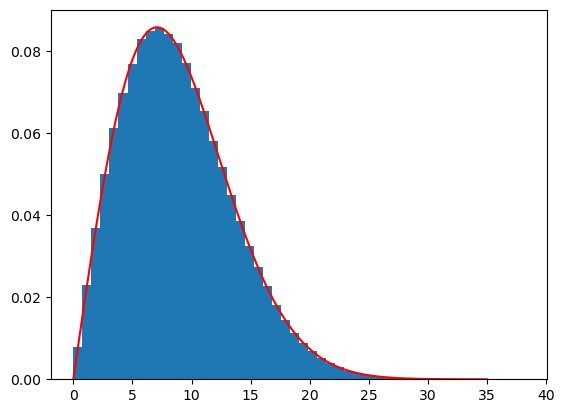

In [71]:
# Simuler og sjekk
nSamp = 1000000
uSamp = np.random.uniform(size = nSamp)
xSamp = Finv(uSamp, theta0)
plt.hist(xSamp, 50, density = True)
xGrid = np.linspace(0, 35, 1000)
yVal = 2*xGrid/theta0*np.exp(-xGrid**2/theta0)
plt.plot(xGrid, yVal, 'r')

In [72]:
# Sjekk formler
print(np.mean(tSamp**2))
print(np.var(tSamp**2, ddof = 1))

99.96452759092736
10029.848669533545


In [95]:
# Estimer p-verdi
B = 10000
indicator = 0
for b in range(B):
    nSamp = 50
    uSamp = np.random.uniform(size = nSamp)
    xSamp = Finv(uSamp, theta0)
    tVal = np.mean(xSamp**2)
    if tVal >= 121.6971:
        indicator += 1
pVal = indicator/B
print(round(pVal, 3))

# Approximate confidence interval
zCrit = stats.norm.ppf(0.95)
print("95% CI: ", round(pVal, 3), "±", round(zCrit*np.sqrt(pVal*(1-pVal)/B), 3), sep = "")

0.067
95% CI: 0.067±0.004


In [93]:
# Tilnærmet for sammenligning
print(round(1-stats.norm.cdf((121.6971-theta0)/np.sqrt(theta0**2/50)),3))

0.062
